# Content
* Motivation
* Install nmrglue
* Plotting 1D spectra

data used in this notebook is taken from [nmrglue's documentation](http://nmrglue.readthedocs.io/en/latest/examples/index.html)

## Motivation

nmrglue is a Python package to analyse NMR data through Python. On [nmrglue's Github](https://github.com/jjhelmus/nmrglue) it is described as:

> nmrglue provides a number of common functions for processing NMR data such as apodization, spectral shifting, Fourier and other transformations, baseline smoothing and flattening, and linear prediction. In addition new processing schemes can be implemented easily using the nmrglue provided functions and the multitude of numerical routines provided by the Numpy and Scipy packages.

> When used in conjunction with the matplotlib (or other) python plotting library nmrglue can be used to create publication quality figures of NMR spectrum or examine data interactively.

nmrglue also provides [documentation](http://nmrglue.readthedocs.io/en/latest/index.html) and have a general [webpage](http://www.nmrglue.com/).

## Installation of nmrglue

For the installation of nmrglue we will use another way than the "conda install" previously introduced. For "nmrglue" we will use pip. In the Anaconda terminal type in:

> pip install nmrglue

and then type,

> y

Now the package should install. After the installation is complete, we can import it like any other Python package.

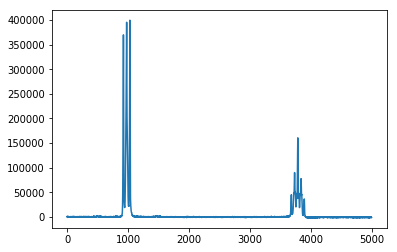

In [14]:
import nmrglue as ng
import matplotlib.pyplot as plt
import nmrglue as np

# read in the bruker formatted data
dic, data = ng.bruker.read('data/expnmr_00001_1')

# remove the digital filter
data = ng.bruker.remove_digital_filter(dic, data)

# process the spectrum
data = ng.proc_base.zf_size(data, 32768)    # zero fill to 32768 points
data = ng.proc_base.fft(data)               # Fourier transform
data = ng.proc_base.ps(data, p0=-50.0)      # phase correction
data = ng.proc_base.di(data)                # discard the imaginaries
data = ng.proc_base.rev(data)               # reverse the data

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[20000:25000])
plt.show()